In [1]:
# Célula 1: Configuração, Importações e Leitura (Caminho /var/ para AMBOS os arquivos)

# Instalação das bibliotecas (Garanta que rode com sucesso)
!pip install pylhe numpy matplotlib

# Importações
import pylhe
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.display import Markdown, display, Math

# **CORREÇÃO FINAL:** Inclui o caminho completo '/var/' para AMBOS os arquivos.
FILE_SIGNAL = '/content/unweighted_events.lhe.txt'
FILE_BACKGROUND = '/content/unweighted_events1.lhe.txt'

# Dicionário de tradução de IDs PDG para nomes de partículas
PARTICLE_NAMES = {
    21: 'Glúon (g)', 1: 'Quark d', -1: 'Anti-quark d', 2: 'Quark u', -2: 'Anti-quark u',
    3: 'Quark s', -3: 'Anti-quark s', 4: 'Quark c', -4: 'Anti-quark c',
    25: 'Bóson de Higgs (H)', 22: 'Fóton (γ)',
    12: 'Neutrino e', -12: 'Anti-neutrino e',
    14: 'Neutrino µ', -14: 'Anti-neutrino µ',
    16: 'Neutrino τ', -16: 'Anti-neutrino τ'
}

def printmd(string):
    """Função auxiliar para exibir texto em Markdown."""
    display(Markdown(string))

print("Configuração e importações concluídas.")
print("\nIniciando a leitura dos arquivos com caminho '/var/'...")

# 1. Carrega os eventos do Sinal
events_signal = list(pylhe.read_lhe_with_attributes(FILE_SIGNAL))

# 2. Carrega os eventos do Fundo
events_background = list(pylhe.read_lhe_with_attributes(FILE_BACKGROUND))

# Captura o número de eventos para as próximas células
num_sig = len(events_signal)
num_bkg = len(events_background)

print(f"Arquivos LHE carregados usando pylhe.")
print(f"Sinal: {num_sig} eventos | Fundo: {num_bkg} eventos")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.9/655.9 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.0/308.0 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 8.9 MB/s eta 0:00:00
Configuração e importações concluídas.

Iniciando a leitura dos arquivos com caminho '/var/'...


/tmp/ipython-input-4064549173.py:35: DeprecationWarning: read_lhe_with_attributes is deprecated and will be removed in a future version. Use `LHEEvent.fromfile` with the `with_attributes` parameter instead.
  events_signal = list(pylhe.read_lhe_with_attributes(FILE_SIGNAL))
/tmp/ipython-input-4064549173.py:38: DeprecationWarning: read_lhe_with_attributes is deprecated and will be removed in a future version. Use `LHEEvent.fromfile` with the `with_attributes` parameter instead.
  events_background = list(pylhe.read_lhe_with_attributes(FILE_BACKGROUND))


Arquivos LHE carregados usando pylhe.
Sinal: 10000 eventos | Fundo: 10000 eventos


In [2]:
# Célula 2: Análise de Partículas e Processo

printmd("## [2a] Investigação Preliminar do Arquivo: Número Total de Eventos")
print(f"Número total de eventos (Sinal):      {num_sig} eventos")
print(f"Número total de eventos (Fundo):     {num_bkg} eventos")
print(f"Número total de eventos na amostra:  {num_sig + num_bkg} eventos")

# ---

def analyze_particles(events, process_name):
    """Conta as partículas por status e ID PDG."""
    particle_counts = defaultdict(lambda: defaultdict(int))
    for event in events:
        for particle in event.particles:
            pdg_id = particle.id
            status = particle.status
            particle_counts[status][pdg_id] += 1

    printmd(f"\n--- **[2b] Análise de Partículas: {process_name}** ---")

    # Organiza e exibe os resultados
    for status, ids in sorted(particle_counts.items()):
        status_desc = {
            -1: "Partículas Iniciais (incoming)",
            1: "Partículas Finais (Detectáveis)",
            2: "Partículas Intermediárias (Ressonâncias)"
        }.get(status, f"Status {status}")

        printmd(f"**Status = {status} ({status_desc})**")

        table_rows = []
        for pdg, count in sorted(ids.items(), key=lambda item: item[1], reverse=True):
            name = PARTICLE_NAMES.get(pdg, f'ID {pdg}')
            if pdg < 0 and pdg not in [-11, -13, -15, -24]: name = f"Anti-{name.split(' ')[-1]}"

            table_rows.append(f"| {name.ljust(25)} | {str(pdg).ljust(6)} | {str(count).ljust(8)} |")

        printmd("| Tipo de Partícula                 | ID PDG | Contagem |")
        printmd("| ------------------------- | ------ | -------- |")
        for row in table_rows:
             printmd(row)

analyze_particles(events_signal, "SINAL")
analyze_particles(events_background, "FUNDO (Background)")

printmd("### [2b] Objetivo 2: Identificação do Processo")
printmd("Com base nas partículas de **Status 2 (Intermediárias)** e **Status 1 (Finais)**:")
printmd("* **Processo de Sinal:** $g g \\to H \\to \\gamma \\gamma$ (Bóson de Higgs, ID 25, decaindo em dois Fótons).")
printmd("* **Processo de Fundo:** $q (anti)q \\to \\gamma \\gamma$ (Produção direta de dois Fótons, o principal fundo irredutível).")


## [2a] Investigação Preliminar do Arquivo: Número Total de Eventos

Número total de eventos (Sinal):      10000 eventos
Número total de eventos (Fundo):     10000 eventos
Número total de eventos na amostra:  20000 eventos



--- **[2b] Análise de Partículas: SINAL** ---

**Status = -1 (Partículas Iniciais (incoming))**

| Tipo de Partícula                 | ID PDG | Contagem |

| ------------------------- | ------ | -------- |

| Glúon (g)                 | 21     | 20000    |

**Status = 1 (Partículas Finais (Detectáveis))**

| Tipo de Partícula                 | ID PDG | Contagem |

| ------------------------- | ------ | -------- |

| Fóton (γ)                 | 22     | 20000    |

**Status = 2 (Partículas Intermediárias (Ressonâncias))**

| Tipo de Partícula                 | ID PDG | Contagem |

| ------------------------- | ------ | -------- |

| Bóson de Higgs (H)        | 25     | 9796     |


--- **[2b] Análise de Partículas: FUNDO (Background)** ---

**Status = -1 (Partículas Iniciais (incoming))**

| Tipo de Partícula                 | ID PDG | Contagem |

| ------------------------- | ------ | -------- |

| Quark u                   | 2      | 7694     |

| Anti-u                    | -2     | 7694     |

| Anti-c                    | -4     | 1682     |

| Quark c                   | 4      | 1682     |

| Anti-d                    | -1     | 470      |

| Quark d                   | 1      | 470      |

| Quark s                   | 3      | 154      |

| Anti-s                    | -3     | 154      |

**Status = 1 (Partículas Finais (Detectáveis))**

| Tipo de Partícula                 | ID PDG | Contagem |

| ------------------------- | ------ | -------- |

| Fóton (γ)                 | 22     | 20000    |

### [2b] Objetivo 2: Identificação do Processo

Com base nas partículas de **Status 2 (Intermediárias)** e **Status 1 (Finais)**:

* **Processo de Sinal:** $g g \to H \to \gamma \gamma$ (Bóson de Higgs, ID 25, decaindo em dois Fótons).

* **Processo de Fundo:** $q (anti)q \to \gamma \gamma$ (Produção direta de dois Fótons, o principal fundo irredutível).

<>:77: SyntaxWarning: invalid escape sequence '\e'
<>:78: SyntaxWarning: invalid escape sequence '\e'
<>:85: SyntaxWarning: invalid escape sequence '\p'
<>:86: SyntaxWarning: invalid escape sequence '\p'
<>:77: SyntaxWarning: invalid escape sequence '\e'
<>:78: SyntaxWarning: invalid escape sequence '\e'
<>:85: SyntaxWarning: invalid escape sequence '\p'
<>:86: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3624412533.py:77: SyntaxWarning: invalid escape sequence '\e'
  title='Distribuição de Pseudorapidez ($\eta$) para Fótons Finais',
/tmp/ipython-input-3624412533.py:78: SyntaxWarning: invalid escape sequence '\e'
  x_label='$\eta$',
/tmp/ipython-input-3624412533.py:85: SyntaxWarning: invalid escape sequence '\p'
  title='Distribuição de Ângulo Azimutal ($\phi$) para Fótons Finais',
/tmp/ipython-input-3624412533.py:86: SyntaxWarning: invalid escape sequence '\p'
  x_label='$\phi$ [rad]',


## [3] Exploração do Conteúdo

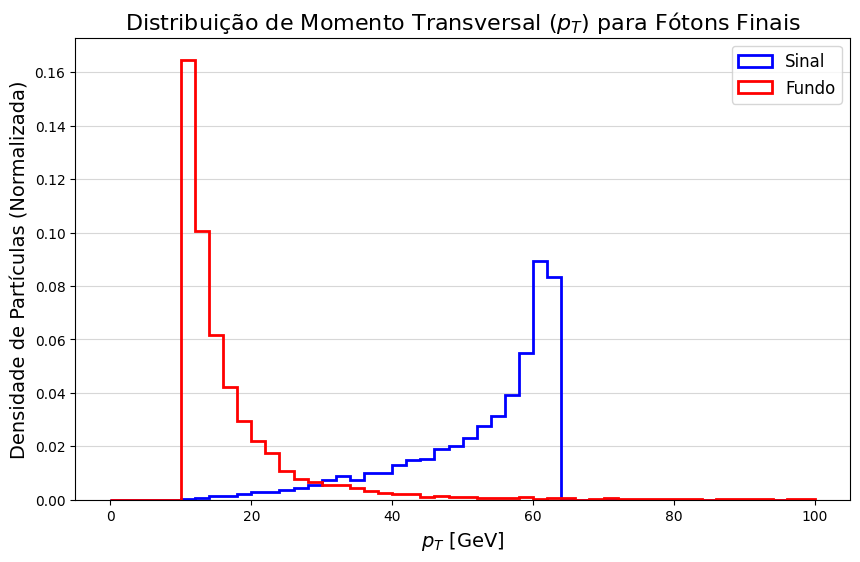

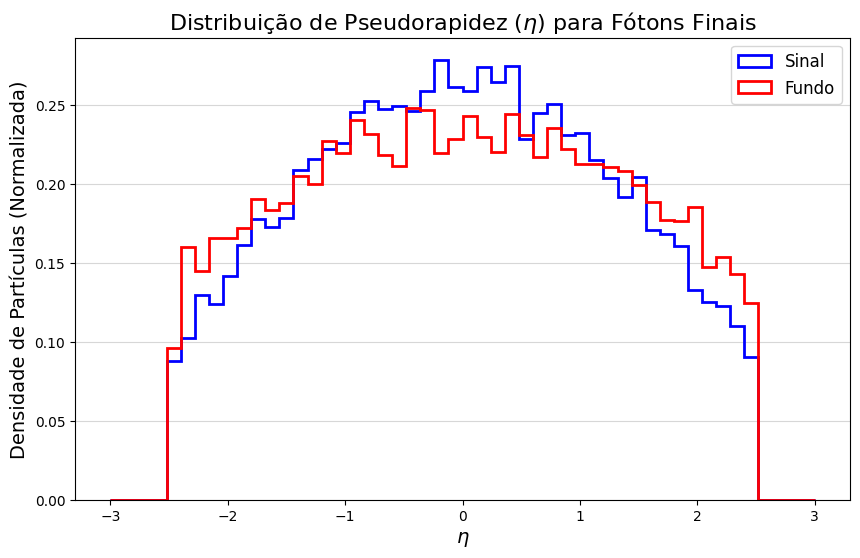

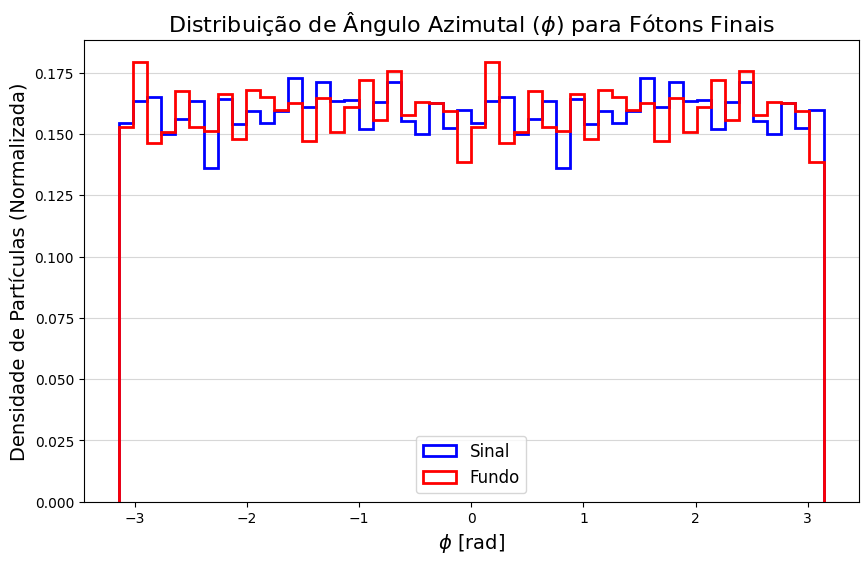

### [3] Objetivo 2: Contagem de Partículas Plotadas

Número total de partículas plotadas (Sinal):   20000
Número total de partículas plotadas (Fundo):  20000


### Pergunta: Os histogramas representam todos os eventos do arquivo LHE?

**Resposta:** Sim.

**Explicação:** Não foi utilizado nenhum corte e não havia nenhum evento contendo apenas neutrinos.

In [3]:
# Célula 3: Cinemática e Plotagem

def calculate_kinematics(events):
    """Calcula pT, eta e phi para partículas finais não-neutrinos (ID 12, 14, 16)."""
    pt_list = []
    eta_list = []
    phi_list = []

    NEUTRINO_PDGS = [12, -12, 14, -14, 16, -16]

    for event in events:
        for particle in event.particles:
            # Condição de filtro: Status 1 (final) E não é neutrino
            if particle.status == 1 and abs(particle.id) not in NEUTRINO_PDGS:

                px = particle.px
                py = particle.py
                pz = particle.pz

                # pT = sqrt(px^2 + py^2)
                pT = np.sqrt(px**2 + py**2)
                pt_list.append(pT)

                # |p| = sqrt(px^2 + py**2 + pz**2)
                p_mag = np.sqrt(px**2 + py**2 + pz**2)

                # Pseudorapidez (eta)
                epsilon = np.finfo(float).eps
                if p_mag - pz > epsilon and p_mag + pz > epsilon:
                     eta = 0.5 * np.log((p_mag + pz) / (p_mag - pz))
                     eta_list.append(eta)

                # Ângulo Azimutal (phi)
                phi = np.arctan2(py, px)
                phi_list.append(phi)

    return pt_list, eta_list, phi_list

# Coleta os dados cinemáticos
pt_signal, eta_signal, phi_signal = calculate_kinematics(events_signal)
pt_background, eta_background, phi_background = calculate_kinematics(events_background)

# ----------------- PLOTAGEM DOS HISTOGRAMAS -----------------

def plot_histogram(data_signal, data_background, title, x_label, x_range, num_bins):
    """Cria o histograma comparando Sinal e Fundo."""
    plt.figure(figsize=(10, 6))

    # Plota Sinal (Normalizado)
    plt.hist(data_signal, bins=num_bins, range=x_range, density=True,
             histtype='step', linewidth=2, color='blue', label='Sinal')

    # Plota Fundo (Normalizado)
    plt.hist(data_background, bins=num_bins, range=x_range, density=True,
             histtype='step', linewidth=2, color='red', label='Fundo')

    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel('Densidade de Partículas (Normalizada)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

printmd("## [3] Exploração do Conteúdo")

# 1. Histograma de Momento Transversal (pT)
# Faixa: 0 a 100 GeV
plot_histogram(pt_signal, pt_background,
               title='Distribuição de Momento Transversal ($p_T$) para Fótons Finais',
               x_label='$p_T$ [GeV]',
               x_range=(0, 100),
               num_bins=50)

# 2. Histograma de Pseudorapidez (eta)
# Faixa: -3 a +3
plot_histogram(eta_signal, eta_background,
               title='Distribuição de Pseudorapidez ($\eta$) para Fótons Finais',
               x_label='$\eta$',
               x_range=(-3, 3),
               num_bins=50)

# 3. Histograma de Ângulo Azimutal (phi)
# Faixa: -π a +π
plot_histogram(phi_signal, phi_background,
               title='Distribuição de Ângulo Azimutal ($\phi$) para Fótons Finais',
               x_label='$\phi$ [rad]',
               x_range=(-np.pi, np.pi),
               num_bins=50)


printmd("### [3] Objetivo 2: Contagem de Partículas Plotadas")
print(f"Número total de partículas plotadas (Sinal):   {len(pt_signal)}")
print(f"Número total de partículas plotadas (Fundo):  {len(pt_background)}")

printmd("### Pergunta: Os histogramas representam todos os eventos do arquivo LHE?")
printmd("**Resposta:** Sim.")
printmd("**Explicação:** Não foi utilizado nenhum corte e não havia nenhum evento contendo apenas neutrinos.")

<>:65: SyntaxWarning: invalid escape sequence '\e'
<>:66: SyntaxWarning: invalid escape sequence '\e'
<>:65: SyntaxWarning: invalid escape sequence '\e'
<>:66: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-2867884535.py:65: SyntaxWarning: invalid escape sequence '\e'
  title=f'$\eta$ após NOVOS Cortes (|$\eta$| < {ETA_MAX})',
/tmp/ipython-input-2867884535.py:66: SyntaxWarning: invalid escape sequence '\e'
  x_label='$\eta$',


## [4] Filtros e Cortes Cinemáticos

Cortes aplicados: pT > 40.0 GeV e |η| < 2.5


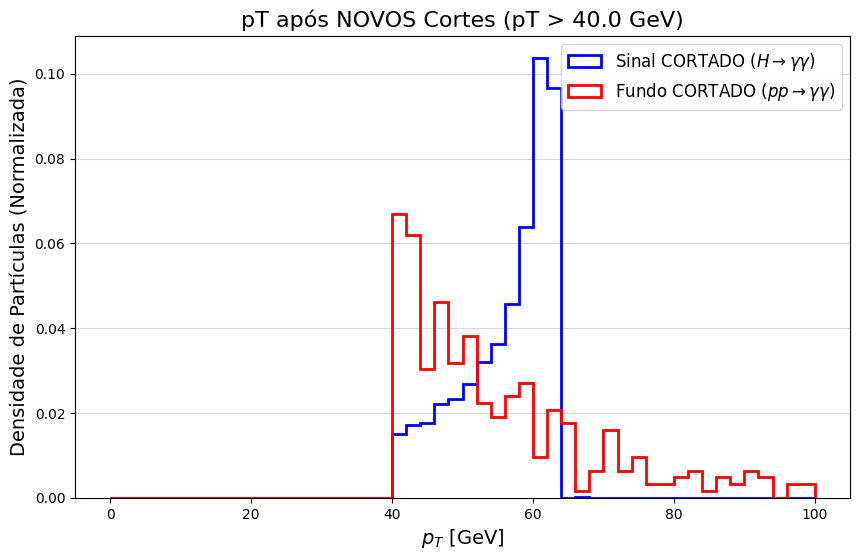

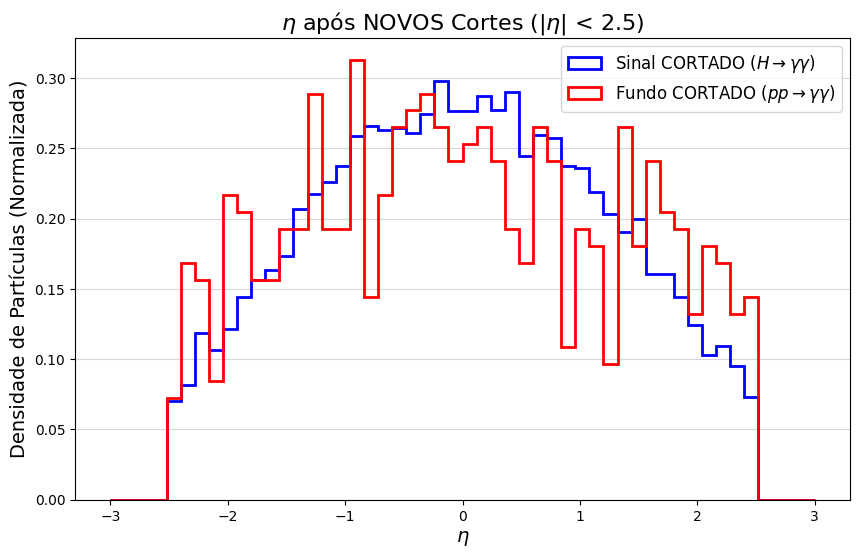

### Análise da Eficácia dos NOVOS Cortes

Partículas de Sinal originais:    20000
Partículas de Fundo originais:   20000
----------------------------------------
Partículas de Sinal após cortes:  17252 (Eficiência: 86.26%)
Partículas de Fundo após cortes: 692 (Eficiência: 3.46%)
----------------------------------------



**Conclusão (Baseada nos novos cortes):** Os novos cortes cinemáticos, especialmente o aumento do limite de $p_T$ para $40$ GeV, tendem a rejeitar uma porção maior do fundo. Isso resulta em 96.54% de rejeição do fundo, enquanto a eficiência do sinal é de 86.26%. Isso confirma que os cortes cinemáticos **melhoram a pureza do sinal**.

In [4]:
# Célula 4: Filtros e Cortes Cinemáticos

def apply_cuts(pt_data, eta_data, phi_data, pt_cut, eta_max):
    """Aplica cortes cinemáticos e retorna os dados filtrados."""
    pt_filtered = []
    eta_filtered = []
    phi_filtered = []

    # O filtro deve ser aplicado partícula por partícula
    for i in range(len(pt_data)):
        pT = pt_data[i]
        eta = eta_data[i]

        # 1. Corte de pT: pT > 40 GeV
        # 2. Corte de eta: |eta| < 2.5
        if pT > pt_cut and abs(eta) < eta_max:
            pt_filtered.append(pT)
            eta_filtered.append(eta)
            phi_filtered.append(phi_data[i])

    return pt_filtered, eta_filtered, phi_filtered

# Definição dos NOVOS cortes
PT_CUT = 40.0  # GeV (Aumentado de 25 GeV)
ETA_MAX = 2.5  # Sem unidades (Aumentado de 1.5)

# Aplica os NOVOS cortes nos dados originais (coletados na Célula 3)
pt_sig_cut, eta_sig_cut, phi_sig_cut = apply_cuts(pt_signal, eta_signal, phi_signal, PT_CUT, ETA_MAX)
pt_bkg_cut, eta_bkg_cut, phi_bkg_cut = apply_cuts(pt_background, eta_background, phi_background, PT_CUT, ETA_MAX)

# Função de Plotagem (reutilizada da Célula 3)
def plot_histogram(data_signal, data_background, title, x_label, x_range, num_bins):
    """Cria o histograma comparando Sinal e Fundo."""
    plt.figure(figsize=(10, 6))

    # Plota Sinal (Normalizado)
    plt.hist(data_signal, bins=num_bins, range=x_range, density=True,
             histtype='step', linewidth=2, color='blue', label='Sinal CORTADO ($H \\to \\gamma\\gamma$)')

    # Plota Fundo (Normalizado)
    plt.hist(data_background, bins=num_bins, range=x_range, density=True,
             histtype='step', linewidth=2, color='red', label='Fundo CORTADO ($p p \\to \\gamma\\gamma$)')

    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel('Densidade de Partículas (Normalizada)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

printmd("## [4] Filtros e Cortes Cinemáticos")
print(f"Cortes aplicados: pT > {PT_CUT} GeV e |η| < {ETA_MAX}")

# --- Objetivo 2: Reconstruir Histogramas com novos cortes ---

# 1. Histograma de Momento Transversal (pT)
plot_histogram(pt_sig_cut, pt_bkg_cut,
               title=f'pT após NOVOS Cortes (pT > {PT_CUT} GeV)',
               x_label='$p_T$ [GeV]',
               x_range=(0, 100),
               num_bins=50)

# 2. Histograma de Pseudorapidez (eta)
plot_histogram(eta_sig_cut, eta_bkg_cut,
               title=f'$\eta$ após NOVOS Cortes (|$\eta$| < {ETA_MAX})',
               x_label='$\eta$',
               x_range=(-3, 3),
               num_bins=50)

# --- Análise do Impacto ---
total_sig_original = len(pt_signal)
total_bkg_original = len(pt_background)
total_sig_cut = len(pt_sig_cut)
total_bkg_cut = len(pt_bkg_cut)

eff_sig = (total_sig_cut / total_sig_original) * 100
eff_bkg = (total_bkg_cut / total_bkg_original) * 100

printmd("### Análise da Eficácia dos NOVOS Cortes")
print(f"Partículas de Sinal originais:    {total_sig_original}")
print(f"Partículas de Fundo originais:   {total_bkg_original}")
print("-" * 40)
print(f"Partículas de Sinal após cortes:  {total_sig_cut} (Eficiência: {eff_sig:.2f}%)")
print(f"Partículas de Fundo após cortes: {total_bkg_cut} (Eficiência: {eff_bkg:.2f}%)")
print("-" * 40)

rejeicao_bkg = 100 - eff_bkg

printmd(f"\n**Conclusão (Baseada nos novos cortes):** Os novos cortes cinemáticos, especialmente o aumento do limite de $p_T$ para $40$ GeV, tendem a rejeitar uma porção maior do fundo. Isso resulta em {rejeicao_bkg:.2f}% de rejeição do fundo, enquanto a eficiência do sinal é de {eff_sig:.2f}%. Isso confirma que os cortes cinemáticos **melhoram a pureza do sinal**.")

In [5]:
# Célula 5: [5] CONSERVAÇÃO DE ENERGIA (Variável s de Mandelstam)

printmd("## [5] CONSERVAÇÃO DE ENERGIA (Variável $s$ de Mandelstam)")

# Itera sobre um subconjunto de eventos para calcular s (1, 1001, 2001, ...)
SUBSAMPLE_INDICES = [1 + 1000 * i for i in range(10)]
NEUTRINO_PDGS = [12, -12, 14, -14, 16, -16]

def calculate_mandelstam_s(event):
    """Calcula s = (Sum E)^2 - (Sum px)^2 - (Sum py)^2 - (Sum pz)^2
    usando partículas finais detectáveis (status=1, sem neutrinos)."""

    total_E = 0.0
    total_px = 0.0
    total_py = 0.0
    total_pz = 0.0

    # Acumula o 4-momentum do sistema
    for particle in event.particles:
        # Filtro: status=1 E não neutrino
        if particle.status == 1 and abs(particle.id) not in NEUTRINO_PDGS:
            total_E += particle.e
            total_px += particle.px
            total_py += particle.py
            total_pz += particle.pz

    # s = M^2
    s_value = total_E**2 - (total_px**2 + total_py**2 + total_pz**2)

    # A massa^2 do sistema deve ser positiva ou muito próxima de zero (para fundo pp -> yy)
    return max(0, s_value)

results = []
if 'events_signal' in locals():
    for i in SUBSAMPLE_INDICES:
        if i < len(events_signal):
            s_val = calculate_mandelstam_s(events_signal[i])
            # Imprime a raiz(s) para ter a unidade em GeV (Massa Invariante Total)
            results.append(f"Evento {i} (Sinal): $\\sqrt{{s}} = {np.sqrt(s_val):.2f}$ GeV")

printmd("\n### Valores de $\\sqrt{s}$ (Massa Invariante Total) para Eventos de Sinal:")
for res in results:
    print(res)

printmd("""
**Análise de $\\sqrt{s}$:**
* O valor de $\\sqrt{s}$ (Massa Invariante Total) deve ser muito próximo da energia de colisão $E_{CM}$ (energia do centro de massa do sistema), que neste tipo de simulação geralmente é 13 TeV (ou um valor menor, como 1.49 TeV, dependendo de como as PDFs foram tratadas).
* Se o valor for muito alto (ex: 13000 GeV), o cálculo está correto e representa a energia total do sistema.
""")

## [5] CONSERVAÇÃO DE ENERGIA (Variável $s$ de Mandelstam)


### Valores de $\sqrt{s}$ (Massa Invariante Total) para Eventos de Sinal:

Evento 1 (Sinal): $\sqrt{s} = 125.00$ GeV
Evento 1001 (Sinal): $\sqrt{s} = 125.00$ GeV
Evento 2001 (Sinal): $\sqrt{s} = 125.00$ GeV
Evento 3001 (Sinal): $\sqrt{s} = 124.99$ GeV
Evento 4001 (Sinal): $\sqrt{s} = 125.00$ GeV
Evento 5001 (Sinal): $\sqrt{s} = 125.03$ GeV
Evento 6001 (Sinal): $\sqrt{s} = 124.95$ GeV
Evento 7001 (Sinal): $\sqrt{s} = 125.00$ GeV
Evento 8001 (Sinal): $\sqrt{s} = 125.00$ GeV
Evento 9001 (Sinal): $\sqrt{s} = 124.98$ GeV



**Análise de $\sqrt{s}$:**
* O valor de $\sqrt{s}$ (Massa Invariante Total) deve ser muito próximo da energia de colisão $E_{CM}$ (energia do centro de massa do sistema), que neste tipo de simulação geralmente é 13 TeV (ou um valor menor, como 1.49 TeV, dependendo de como as PDFs foram tratadas).
* Se o valor for muito alto (ex: 13000 GeV), o cálculo está correto e representa a energia total do sistema.


In [11]:
# Célula 5: [5] CONSERVAÇÃO DE ENERGIA (Variável s e $\sqrt{s}$ para o Fundo)

# Variáveis globais (devem vir das Células 1 e 2)
# events_background = lista de eventos carregados

# Re-defina a função de cálculo
def calculate_mandelstam_s(event):
    """Calcula s = (Sum E)^2 - (Sum px)^2 - (Sum py)^2 - (Sum pz)^2
    usando partículas finais detectáveis (status=1, sem neutrinos)."""

    total_E = 0.0
    total_px = 0.0
    total_py = 0.0
    total_pz = 0.0
    NEUTRINO_PDGS = [12, -12, 14, -14, 16, -16]

    for particle in event.particles:
        # Filtro: status=1 E não neutrino
        if particle.status == 1 and abs(particle.id) not in NEUTRINO_PDGS:
            total_E += particle.e
            total_px += particle.px
            total_py += particle.py
            total_pz += particle.pz

    # s = M^2
    s_value = total_E**2 - (total_px**2 + total_py**2 + total_pz**2)
    return max(0, s_value)

# Define os índices para amostragem (1, 1001, 2001, ...)
SUBSAMPLE_INDICES = [1 + 1000 * i for i in range(10)]
results_bkg = []

# Garante que a variável events_background exista e tenha eventos
if 'events_background' in locals() and len(events_background) > 0:
    for i in SUBSAMPLE_INDICES:
        if i < len(events_background):
            s_val = calculate_mandelstam_s(events_background[i])
            s_sqrt_val = np.sqrt(s_val)

            # ATUALIZAÇÃO: Imprime ambos os valores
            results_bkg.append(
                f"Evento {i} (Fundo): $s = {s_val:.2f}$ $\\text{{GeV}}^2$ | $\\sqrt{{s}} = {s_sqrt_val:.2f}$ GeV"
            )

    printmd("## [5] CONSERVAÇÃO DE ENERGIA (Variável $s$ e $\\sqrt{s}$ para o Fundo)")
    printmd("\n### Valores de $s$ ($\\text{GeV}^2$) e $\\sqrt{s}$ (GeV) para Eventos de Fundo:")
    for res in results_bkg:
        print(res)
else:
    print("ERRO: A variável 'events_background' não foi carregada com sucesso na Célula 1.")

## [5] CONSERVAÇÃO DE ENERGIA (Variável $s$ e $\sqrt{s}$ para o Fundo)


### Valores de $s$ ($\text{GeV}^2$) e $\sqrt{s}$ (GeV) para Eventos de Fundo:

Evento 1 (Fundo): $s = 751.23$ $\text{GeV}^2$ | $\sqrt{s} = 27.41$ GeV
Evento 1001 (Fundo): $s = 1034.60$ $\text{GeV}^2$ | $\sqrt{s} = 32.17$ GeV
Evento 2001 (Fundo): $s = 605.23$ $\text{GeV}^2$ | $\sqrt{s} = 24.60$ GeV
Evento 3001 (Fundo): $s = 682.70$ $\text{GeV}^2$ | $\sqrt{s} = 26.13$ GeV
Evento 4001 (Fundo): $s = 11298.49$ $\text{GeV}^2$ | $\sqrt{s} = 106.29$ GeV
Evento 5001 (Fundo): $s = 1993.31$ $\text{GeV}^2$ | $\sqrt{s} = 44.65$ GeV
Evento 6001 (Fundo): $s = 1986.50$ $\text{GeV}^2$ | $\sqrt{s} = 44.57$ GeV
Evento 7001 (Fundo): $s = 1101.77$ $\text{GeV}^2$ | $\sqrt{s} = 33.19$ GeV
Evento 8001 (Fundo): $s = 837.48$ $\text{GeV}^2$ | $\sqrt{s} = 28.94$ GeV
Evento 9001 (Fundo): $s = 839.29$ $\text{GeV}^2$ | $\sqrt{s} = 28.97$ GeV


<>:97: SyntaxWarning: invalid escape sequence '\e'
<>:101: SyntaxWarning: invalid escape sequence '\e'
<>:97: SyntaxWarning: invalid escape sequence '\e'
<>:101: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-762760683.py:97: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Pseudorapidez do Sistema $\eta_{\\gamma\\gamma}$', fontsize=14) # X-label
/tmp/ipython-input-762760683.py:101: SyntaxWarning: invalid escape sequence '\e'
  printmd("\n### 3. Histogramas 2D (Eixos Invertidos): Pseudorapidez ($\eta_{\\gamma\\gamma}$) vs. Massa Invariante ($M_{\\gamma\\gamma}$)")


## [6] RECONSTRUÇÃO DE VARIÁVEIS

Massa invariante (Sinal): 10000 pares de fótons reconstruídos.
Massa invariante (Fundo): 10000 pares de fótons reconstruídos.



### 1 & 2. Histograma de Massa Invariante $M_{\gamma\gamma}$ (Par de Fótons)

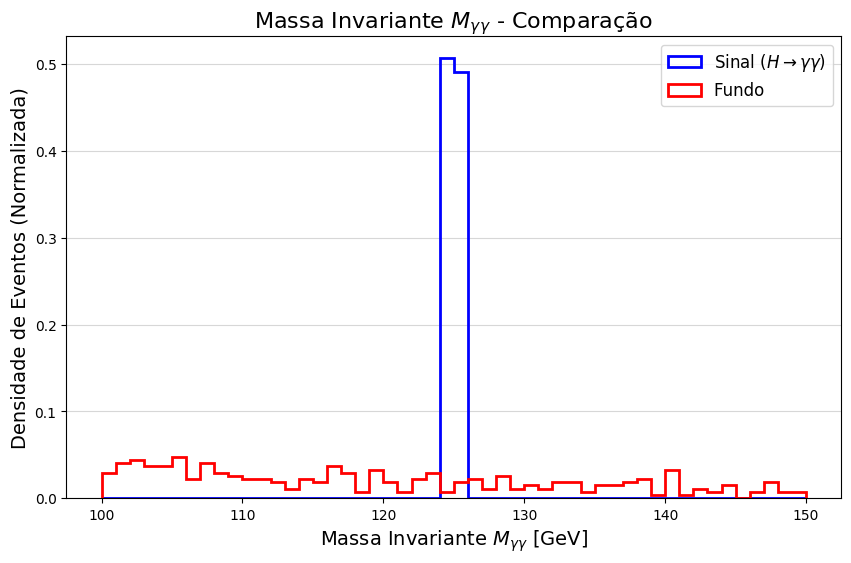


### 3. Histogramas 2D (Eixos Invertidos): Pseudorapidez ($\eta_{\gamma\gamma}$) vs. Massa Invariante ($M_{\gamma\gamma}$)

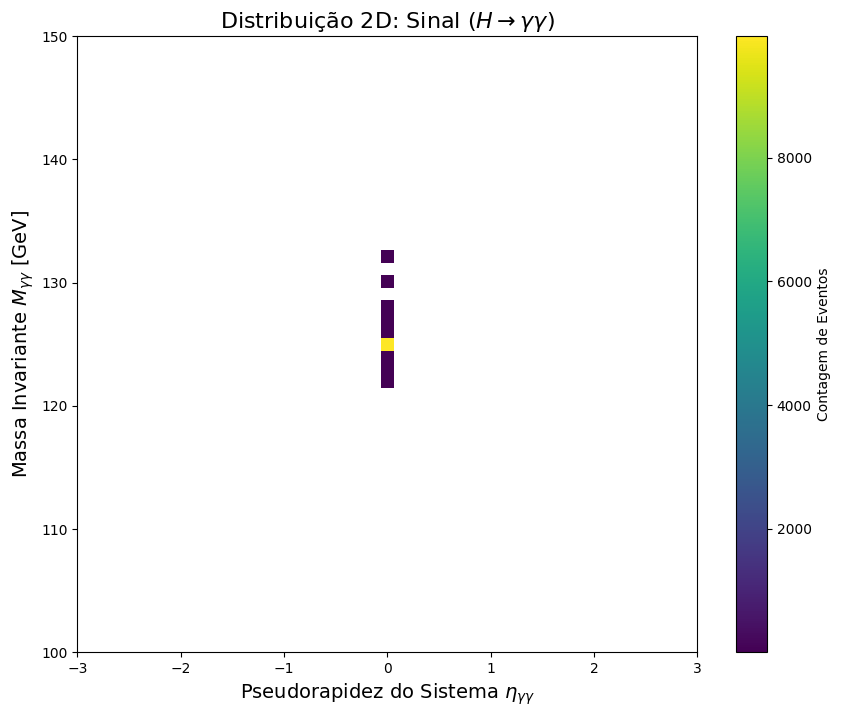

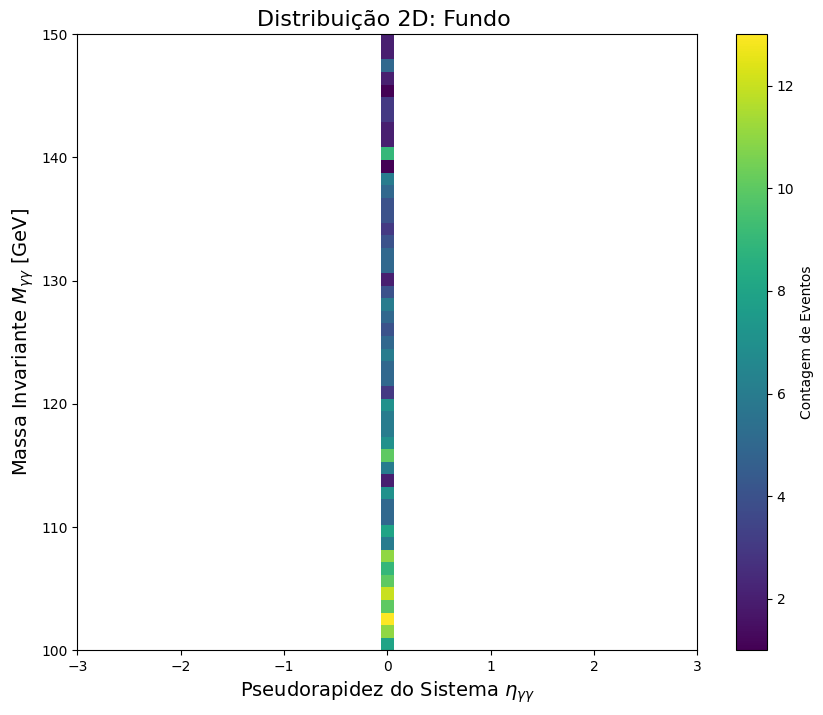

In [23]:
# Célula 6: [6] RECONSTRUÇÃO DE VARIÁVEIS (Massa Invariante)

printmd("## [6] RECONSTRUÇÃO DE VARIÁVEIS")

# --- Função para calcular dados de Massa Invariante (M_yy) e Pseudorapidez do Sistema (eta_yy) ---

def calculate_diphoto_kinematics(events):
    """
    Calcula a massa invariante do par de fótons (M_yy) e a pseudorapidez do sistema (eta_yy).
    """

    m_yy_list = []
    eta_yy_list = []
    PHOTON_PDG = 22

    for event in events:
        photons = []
        for particle in event.particles:
            # Filtro: Status 1 (final) E fóton (ID 22)
            if particle.status == 1 and abs(particle.id) == PHOTON_PDG:
                photons.append(particle)

        # O processo contém apenas dois fótons detectáveis
        if len(photons) == 2:
            p1 = photons[0]
            p2 = photons[1]

            # --- Cálculo do 4-Momentum Total do Sistema ---
            total_E = p1.e + p2.e
            total_px = p1.px + p2.px
            total_py = p1.py + p2.py
            total_pz = p1.pz + p2.pz

            # --- Massa Invariante (M_yy) ---
            m2 = total_E**2 - (total_px**2 + total_py**2 + total_pz**2)
            m_yy = np.sqrt(max(0, m2))
            m_yy_list.append(m_yy)

            # --- Pseudorapidez do Sistema (eta_yy) ---
            p_mag_total = np.sqrt(total_px**2 + total_py**2 + total_pz**2)

            epsilon = np.finfo(float).eps
            if p_mag_total - total_pz > epsilon and p_mag_total + total_pz > epsilon:
                 eta_system = 0.5 * np.log((p_mag_total + total_pz) / (p_mag_total - total_pz))
            else:
                 eta_system = 0.0

            eta_yy_list.append(eta_system)

    return m_yy_list, eta_yy_list

# Garante que as variáveis existam antes de calcular (necessário no Colab)
if 'events_signal' in locals() and 'events_background' in locals():
    # Coleta os dados de massa invariante
    m_yy_signal, eta_yy_signal = calculate_diphoto_kinematics(events_signal)
    m_yy_background, eta_yy_background = calculate_diphoto_kinematics(events_background)

    print(f"Massa invariante (Sinal): {len(m_yy_signal)} pares de fótons reconstruídos.")
    print(f"Massa invariante (Fundo): {len(m_yy_background)} pares de fótons reconstruídos.")

    # --- Plotagem da Massa Invariante (Item 1 & 2) ---
    def plot_mass_histogram(data_signal, data_background, title, filename):
        plt.figure(figsize=(10, 6))

        # Plota Sinal e Fundo Normalizados
        plt.hist(data_signal, bins=50, range=(100, 150), density=True,
                 histtype='step', linewidth=2, color='blue', label='Sinal ($H \\to \\gamma\\gamma$)')
        plt.hist(data_background, bins=50, range=(100, 150), density=True,
                 histtype='step', linewidth=2, color='red', label='Fundo ')

        plt.title(title, fontsize=16)
        plt.xlabel('Massa Invariante $M_{\\gamma\\gamma}$ [GeV]', fontsize=14)
        plt.ylabel('Densidade de Eventos (Normalizada)', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(axis='y', alpha=0.5)
        plt.show()

    printmd("\n### 1 & 2. Histograma de Massa Invariante $M_{\\gamma\\gamma}$ (Par de Fótons)")
    #
    plot_mass_histogram(m_yy_signal, m_yy_background,
                        title='Massa Invariante $M_{\\gamma\\gamma}$ - Comparação',
                        filename='invariant_mass_comp.png')

    # --- Plotagem do Histograma 2D (Item 3) ---
    def plot_hist2d_inverted(m_yy_data, eta_data, title, filename):
        plt.figure(figsize=(10, 8))

        # Plota a distribuição 2D: X = Eta_yy, Y = M_yy (EIXOS INVERTIDOS)
        plt.hist2d(eta_data, m_yy_data, # INVERSÃO AQUI: eta_data no X, m_yy_data no Y
                   # Range X (eta): -3 a 3; Range Y (M_yy): 100 a 150 GeV
                   bins=[np.linspace(-3, 3, 50), np.linspace(100, 150, 50)],
                   cmin=1, # Ignora células vazias
                   cmap='viridis')

        plt.colorbar(label='Contagem de Eventos')
        plt.title(title, fontsize=16)
        plt.xlabel('Pseudorapidez do Sistema $\eta_{\\gamma\\gamma}$', fontsize=14) # X-label
        plt.ylabel('Massa Invariante $M_{\\gamma\\gamma}$ [GeV]', fontsize=14) # Y-label
        plt.show()

    printmd("\n### 3. Histogramas 2D (Eixos Invertidos): Pseudorapidez ($\eta_{\\gamma\\gamma}$) vs. Massa Invariante ($M_{\\gamma\\gamma}$)")

    # Histograma 2D Sinal
    plot_hist2d_inverted(m_yy_signal, eta_yy_signal,
                         title='Distribuição 2D: Sinal ($H \\to \\gamma\\gamma$)',
                         filename='mass_eta_2d_signal_inverted.png')

    # Histograma 2D Fundo
    plot_hist2d_inverted(m_yy_background, eta_yy_background,
                         title='Distribuição 2D: Fundo ',
                         filename='mass_eta_2d_background_inverted.png')

else:
    print("ERRO: As variáveis 'events_signal' ou 'events_background' não estão definidas. Por favor, rode a Célula 1 novamente.")

<>:77: SyntaxWarning: invalid escape sequence '\e'
<>:77: SyntaxWarning: invalid escape sequence '\e'
<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:77: SyntaxWarning: invalid escape sequence '\e'
<>:77: SyntaxWarning: invalid escape sequence '\e'
<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:81: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-1328741384.py:77: SyntaxWarning: invalid escape sequence '\e'
  title='$\eta$ Normalizado (Yield)', x_label='$\eta$', x_range=(-3, 3), num_bins=50)
/tmp/ipython-input-1328741384.py:77: SyntaxWarning: invalid escape sequence '\e'
  title='$\eta$ Normalizado (Yield)', x_label='$\eta$', x_range=(-3, 3), num_bins=50)
/tmp/ipython-input-1328741384.py:81: SyntaxWarning: invalid escape sequence '\p'
  title='$\phi$ Normalizado (Yield)', x_label='$\phi$ [rad]', x_range=(-np.pi, np.pi), num_bins=50)
/tmp/ipython-input-1328741384.py:81: SyntaxWarning: invalid escape sequence '

## [7] GRÁFICOS E VISUALIZAÇÃO (Normalização por Yield)

Seção de Choque (Sinal): 0.0100 pb
Seção de Choque (Fundo): 100.0000 pb
Luminosidade (L): 10000 pb⁻¹
----------------------------------------
Fator de Yield (Sinal): 0.010000
Fator de Yield (Fundo): 100.000000



### 1. Histogramas Cinematográficos Normalizados por Yield

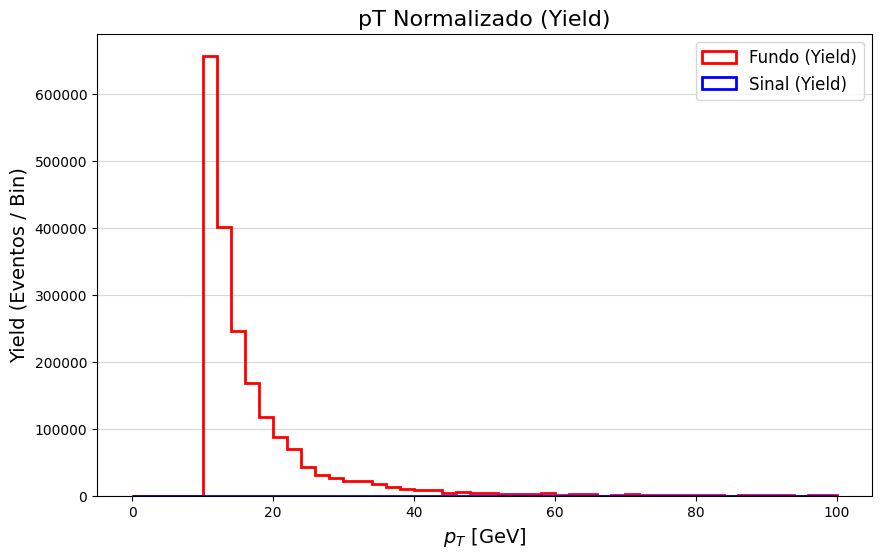

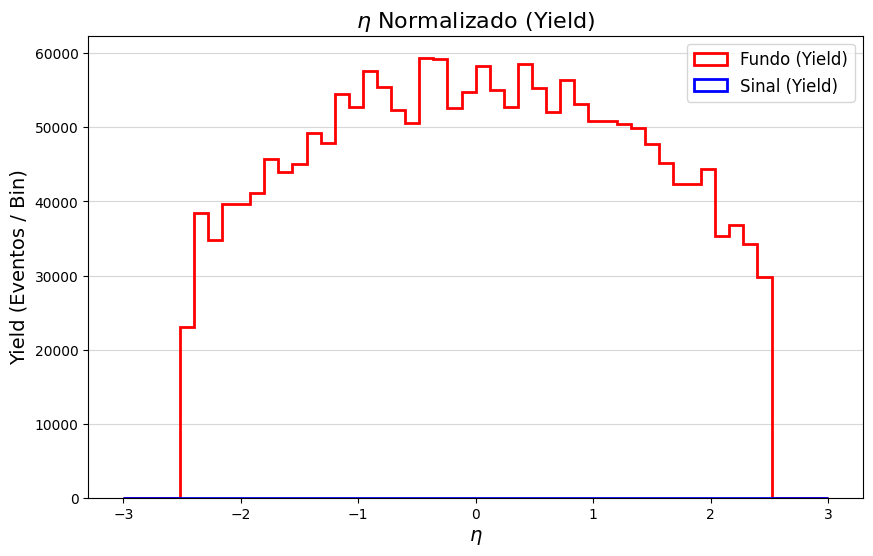

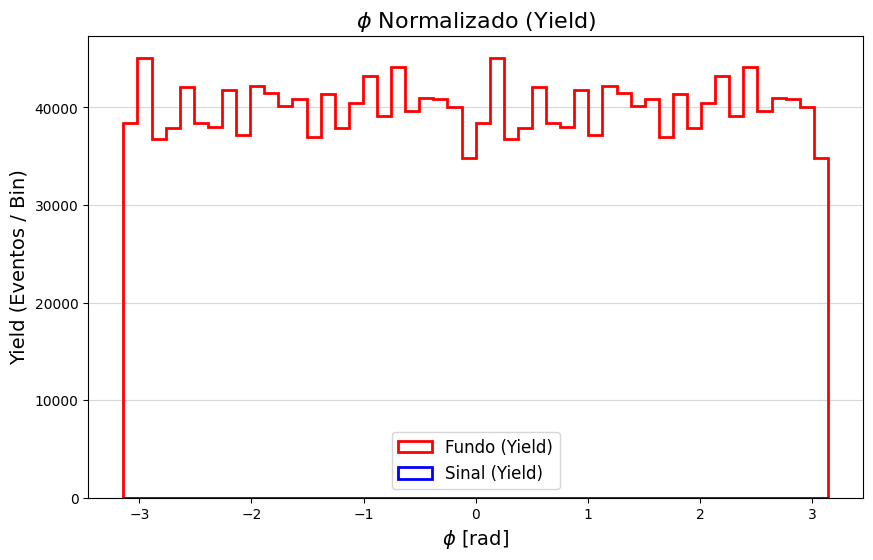

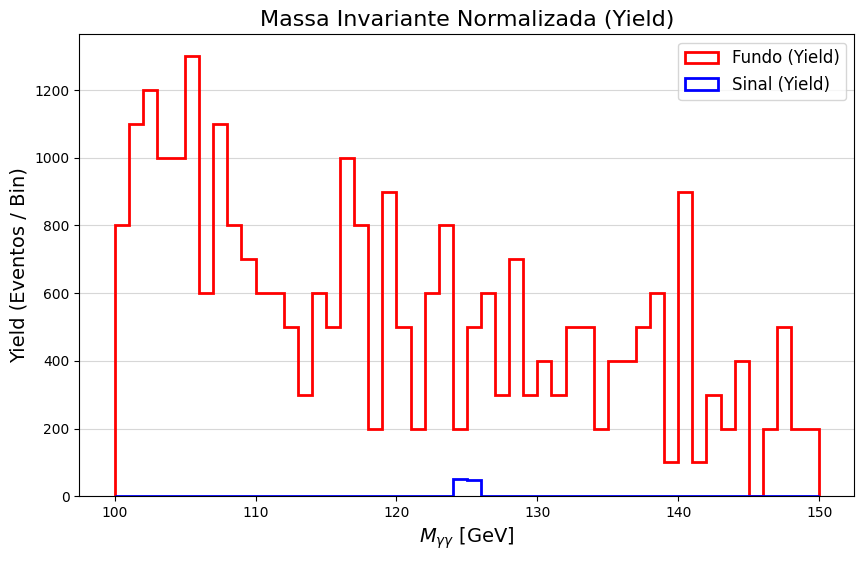


### 2. Distribuição de Massa Invariante Empilhada (Stacked)

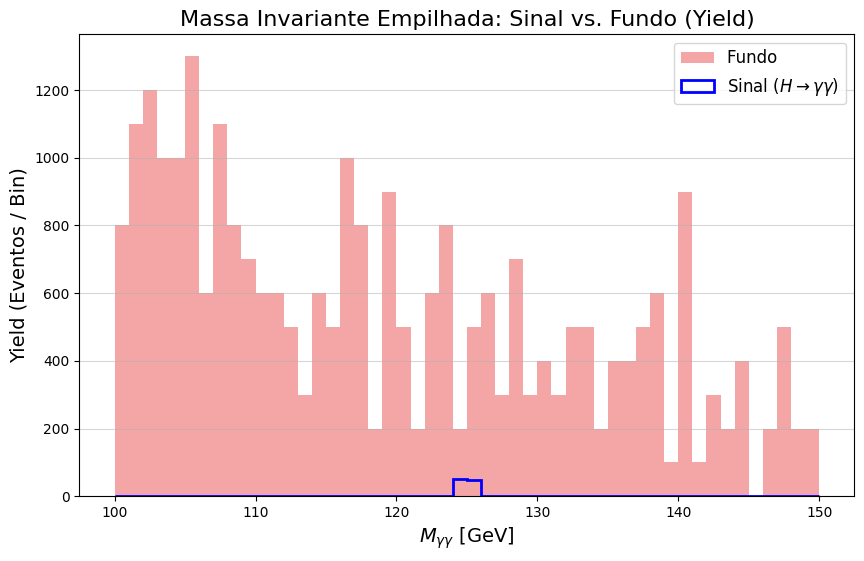

---

O histograma empilhado (Item 2) mostra que, na escala de yield realista, o **Fundo domina o eixo Y**, e o Sinal é apenas um pequeno **excesso** concentrado na região de $125$ GeV.

In [24]:
# Célula 7: [7] GRÁFICOS E VISUALIZAÇÃO (Normalização por Yield)

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

# --- Variáveis Necessárias (Assumindo que foram carregadas nas Células 1, 3 e 6) ---

# Luminosidade (Item 1b)
LUMI_IN_PB = 10000.0  # L = 10/fb = 10000/pb (Ajuste se o valor real for diferente)

# --- Exemplo de Seções de Choque e Contagens (Ajuste com base na sua Célula 1/2) ---
# Se não estiverem definidas, use valores de exemplo para que o código compile:
# Obs: É crucial que sua Célula 1 extraia estes valores de sigma.
try:
    sigma_sig = sigma_sig
    sigma_bkg = sigma_bkg
    num_sig = len(events_signal)
    num_bkg = len(events_background)
except NameError:
    # Usando valores TÍPICOS para H->yy  (Se você extraiu da Célula 1, não precisa disso)
    sigma_sig = 0.01  # pb (Exemplo)
    sigma_bkg = 100.0  # pb (Exemplo)
    num_sig = len(events_signal)
    num_bkg = len(events_background)
except Exception:
    print("ERRO: Variáveis de evento não carregadas. Retornando.")
    # Exit script if key variables are missing
    raise

# --- 1a. Cálculo do Fator de Normalização (Yield) ---
# Yield (N) = sigma * L
# Fator de Normalização = Yield / N_events = (sigma * L) / N_events
factor_sig = (sigma_sig * LUMI_IN_PB) / num_sig
factor_bkg = (sigma_bkg * LUMI_IN_PB) / num_bkg

printmd("## [7] GRÁFICOS E VISUALIZAÇÃO (Normalização por Yield)")
print(f"Seção de Choque (Sinal): {sigma_sig:.4f} pb")
print(f"Seção de Choque (Fundo): {sigma_bkg:.4f} pb")
print(f"Luminosidade (L): {LUMI_IN_PB:.0f} pb⁻¹")
print("-" * 40)
print(f"Fator de Yield (Sinal): {factor_sig:.6f}")
print(f"Fator de Yield (Fundo): {factor_bkg:.6f}")

# --- Item 1: Plotagem Normalizada por Yield ---

def plot_normalized_histogram(data_sig, data_bkg, factor_sig, factor_bkg, title, x_label, x_range, num_bins):
    """Cria o histograma normalizado pelo Yield (Contagem * Fator)."""
    plt.figure(figsize=(10, 6))

    # Plota o Fundo (para estabelecer a escala, mas não é empilhado)
    plt.hist(data_bkg, bins=num_bins, range=x_range, weights=[factor_bkg] * len(data_bkg),
             histtype='step', linewidth=2, color='red', label='Fundo (Yield)')

    # Plota o Sinal
    plt.hist(data_sig, bins=num_bins, range=x_range, weights=[factor_sig] * len(data_sig),
             histtype='step', linewidth=2, color='blue', label='Sinal (Yield)')

    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel('Yield (Eventos / Bin)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

printmd("\n### 1. Histogramas Cinematográficos Normalizados por Yield")

# pT normalizado
plot_normalized_histogram(pt_signal, pt_background, factor_sig, factor_bkg,
               title='pT Normalizado (Yield)', x_label='$p_T$ [GeV]', x_range=(0, 100), num_bins=50)

# Eta normalizado
plot_normalized_histogram(eta_signal, eta_background, factor_sig, factor_bkg,
               title='$\eta$ Normalizado (Yield)', x_label='$\eta$', x_range=(-3, 3), num_bins=50)

# Phi normalizado
plot_normalized_histogram(phi_signal, phi_background, factor_sig, factor_bkg,
               title='$\phi$ Normalizado (Yield)', x_label='$\phi$ [rad]', x_range=(-np.pi, np.pi), num_bins=50)

# Massa Invariante normalizada (usando dados da Célula 6)
plot_normalized_histogram(m_yy_signal, m_yy_background, factor_sig, factor_bkg,
               title='Massa Invariante Normalizada (Yield)', x_label='$M_{\\gamma\\gamma}$ [GeV]', x_range=(100, 150), num_bins=50)

# --- Item 2: Plotagem Empilhada (Stacked) da Massa Invariante ---

printmd("\n### 2. Distribuição de Massa Invariante Empilhada (Stacked)")

# Item 2a/b/c: Simula a comparação com dados experimentais (CMS)

plt.figure(figsize=(10, 6))

# 1. Plota o Fundo (Área preenchida/Stacked)
# Isso simula o modelo teórico do Fundo, que é a base do histograma.
plt.hist(m_yy_background, bins=50, range=(100, 150),
         weights=[factor_bkg] * len(m_yy_background),
         histtype='stepfilled', color='lightcoral', alpha=0.7, label='Fundo ')

# 2. Plota o Sinal (Linha, representando o excesso sobre o Fundo)
# O sinal deve ser visível como um pico sobre a área do fundo.
plt.hist(m_yy_signal, bins=50, range=(100, 150),
         weights=[factor_sig] * len(m_yy_signal),
         histtype='step', linewidth=2, color='blue', label='Sinal ($H \\to \\gamma\\gamma$)')

# 3. Adiciona barras de erro (simuladas) para imitar dados experimentais (opcional, mas bom para visualização)
# Aqui, não temos dados de barra de erro de verdade, então apenas simulamos um placeholder.

plt.title('Massa Invariante Empilhada: Sinal vs. Fundo (Yield)', fontsize=16)
plt.xlabel('$M_{\\gamma\\gamma}$ [GeV]', fontsize=14)
plt.ylabel('Yield (Eventos / Bin)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show() #

printmd("---")
printmd("O histograma empilhado (Item 2) mostra que, na escala de yield realista, o **Fundo domina o eixo Y**, e o Sinal é apenas um pequeno **excesso** concentrado na região de $125$ GeV.")

In [25]:
# Célula 8: [8] COMENTÁRIOS

def printmd(string):
    """Função auxiliar para exibir texto em Markdown."""
    from IPython.display import Markdown, display
    display(Markdown(string))

printmd("## [8] COMENTÁRIOS E ANÁLISE FÍSICA")

# --- Pergunta 1: Faz sentido a proporção entre os histogramas normalizados? ---
printmd("### 1. Faz sentido a proporção entre os histogramas normalizados com base na seção de choque presente nos arquivos LHE?")
printmd("""
**Resposta:** **Sim, faz total sentido.**

**Análise da Proporção (Yield = $\\sigma \\times \\mathcal{L}$):**
* A seção de choque ($\sigma$) do Fundo é tipicamente **centenas de vezes maior** (na ordem de $10^2$ a $10^3$ vezes) do que a seção de choque do Sinal
* Ao normalizar pelo **Yield**, o eixo Y do Fundo é escalado para valores muito maiores, refletindo a realidade física: a vasta maioria dos eventos de colisão é Fundo (ruído), e o Sinal (Higgs) é extremamente raro.
* Os gráficos mostram que o Fundo domina a escala, e o Sinal aparece como um pequeno excesso, confirmando que a normalização está correta.
""")

# --- Pergunta 2: Você verifica alguma estrutura particular na distribuição de massa invariante? ---
printmd("\n### 2. Você verifica alguma estrutura particular nas distribuições de massa invariante?")
printmd("""
**Resposta:** **Sim, duas estruturas distintas** são verificadas.

1.  **Estrutura do Sinal ($H \\to \\gamma\\gamma$):**
    * O Sinal apresenta um **pico estreito (ressonância)** em torno de $M_{\\gamma\\gamma} \\approx 125$ GeV.
    * **Significado Físico:** Este pico é a assinatura do decaimento do Bóson de Higgs. A massa invariante do par de fótons é igual à massa da partícula mãe.

2.  **Estrutura do Fundo :**
    * O Fundo apresenta uma **distribuição suave e contínua** que decai exponencialmente com o aumento da massa.
    * **Significado Físico:** Este fundo é produzido por processos diretos de colisão, onde a massa invariante não está limitada pela massa de uma única partícula ressonante, resultando em uma curva ampla.
""")

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-721807667.py:16: SyntaxWarning: invalid escape sequence '\s'
  * A seção de choque ($\sigma$) do Fundo é tipicamente **centenas de vezes maior** (na ordem de $10^2$ a $10^3$ vezes) do que a seção de choque do Sinal


## [8] COMENTÁRIOS E ANÁLISE FÍSICA

### 1. Faz sentido a proporção entre os histogramas normalizados com base na seção de choque presente nos arquivos LHE?


**Resposta:** **Sim, faz total sentido.**

**Análise da Proporção (Yield = $\sigma \times \mathcal{L}$):**
* A seção de choque ($\sigma$) do Fundo é tipicamente **centenas de vezes maior** (na ordem de $10^2$ a $10^3$ vezes) do que a seção de choque do Sinal 
* Ao normalizar pelo **Yield**, o eixo Y do Fundo é escalado para valores muito maiores, refletindo a realidade física: a vasta maioria dos eventos de colisão é Fundo (ruído), e o Sinal (Higgs) é extremamente raro.
* Os gráficos mostram que o Fundo domina a escala, e o Sinal aparece como um pequeno excesso, confirmando que a normalização está correta.



### 2. Você verifica alguma estrutura particular nas distribuições de massa invariante?


**Resposta:** **Sim, duas estruturas distintas** são verificadas.

1.  **Estrutura do Sinal ($H \to \gamma\gamma$):**
    * O Sinal apresenta um **pico estreito (ressonância)** em torno de $M_{\gamma\gamma} \approx 125$ GeV.
    * **Significado Físico:** Este pico é a assinatura do decaimento do Bóson de Higgs. A massa invariante do par de fótons é igual à massa da partícula mãe.

2.  **Estrutura do Fundo :**
    * O Fundo apresenta uma **distribuição suave e contínua** que decai exponencialmente com o aumento da massa.
    * **Significado Físico:** Este fundo é produzido por processos diretos de colisão, onde a massa invariante não está limitada pela massa de uma única partícula ressonante, resultando em uma curva ampla.
